In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adaline import AdalineGD, AdalineSGD
from graphhelpers import plot_decision_regions

%matplotlib inline

---
## Data Preparation ##

In [2]:
colNames = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
df = pd.read_csv('../data/iris/iris.data', header=None, names=colNames)
y = df.iloc[:100,4].values  # Grab only the first 2 classifications (first 100 rows)
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100,[0,2]].values  # Grab only the 1st and 3rd column

---
## Adaline Learning Rate & Errors ##

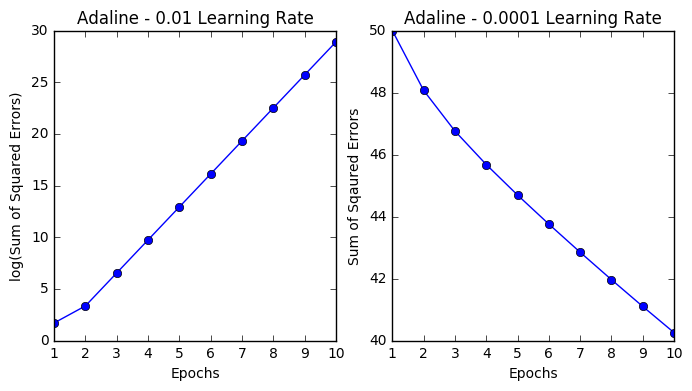

In [3]:
_, (leftPlot, rightPlot) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(nIterations=10, learningRate=.01).fit(X, y)
leftPlot.plot(range(1, len(ada1.cost) + 1), np.log10(ada1.cost), marker='o')
leftPlot.set_xlabel('Epochs')
leftPlot.set_ylabel('log(Sum of Squared Errors)')
leftPlot.set_title('Adaline - 0.01 Learning Rate')

ada2 = AdalineGD(nIterations=10, learningRate=.0001).fit(X, y)
rightPlot.plot(range(1, len(ada2.cost) + 1), ada2.cost, marker='o')
rightPlot.set_xlabel('Epochs')
rightPlot.set_ylabel('Sum of Sqaured Errors')
rightPlot.set_title('Adaline - 0.0001 Learning Rate')
plt.show()

---
## Standardization (Type of Feature Scaling) ##


This helps with gradient decent (along with other algorithms)

In [4]:
X_std = np.copy(X)
for c in xrange(X.shape[1]):
    X_std[:, c] = (X[:, c] - X[:, c].mean()) / X[:, c].std()

---
## Adaline After Standardization ##

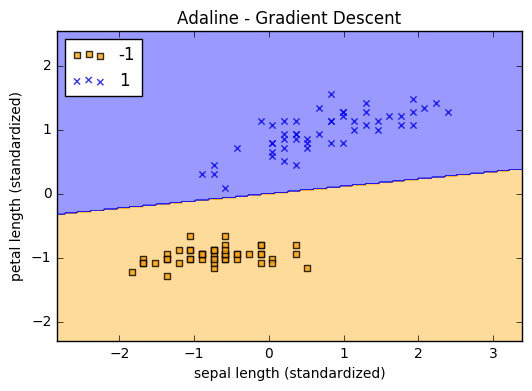

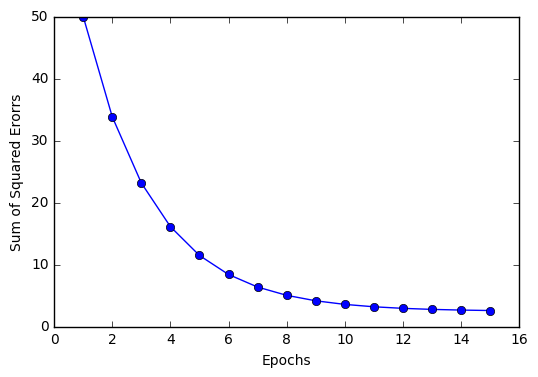

In [5]:
ada = AdalineGD(nIterations=15, learningRate=.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost) + 1), ada.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Erorrs')

---
## Adaline - Stochastic Gradient Descent ##

In [6]:
adaSGD = AdalineSGD(nIterations=15, learningRate=.01, randomState=1)
adaSGD.fit(X_std, y)

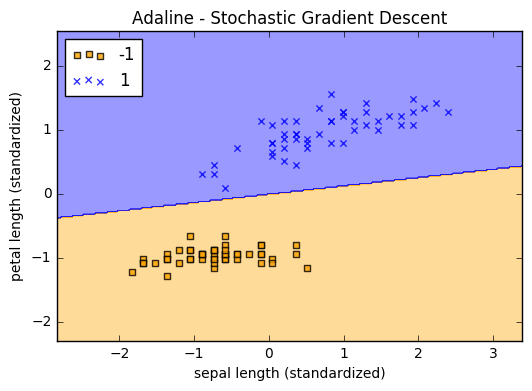

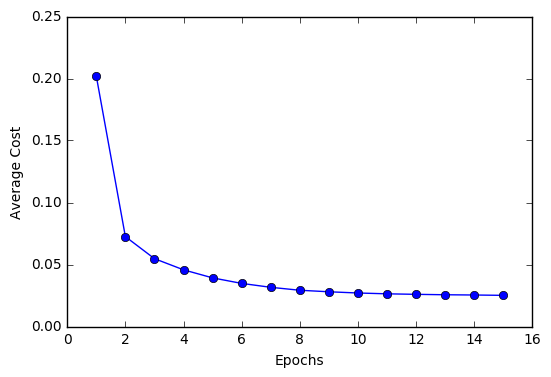

In [7]:
plot_decision_regions(X_std, y, classifier=adaSGD)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(adaSGD.cost) + 1), adaSGD.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

---
## Online Learning ##

In [8]:
adaSGD.partial_fit(X_std[0, :], y[0])  # only 1 data point